# Getting Ahead of the Headline 
Analyzing employee emails using Natural Language Processing, Sentiment Analysis, and Time Series Analysis<br>

![](00_Stephanie/images/0_header.png)
Enron Topic Modeling | Codeup, Hopper Cohort | March 2022<br><br>
>Paige Guajardo<br>
Rajaram Gautam<br>
Stephanie Jones<br>
Kaniela Denis<br><br>

# Executive Summary
## Background
Enron Corporation was a major American energy, commodities, and services company that declared bankruptcy in December 2001 after over a decade of fraudulent accounting practices. During an error of more lenient financial regulations and high market speculation, Enron hid its financial losses in special purposes entities, making it appear much more profitable on paper than it actually was.<br><br>

Enron has become synonymous with willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes-Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.

## Background
Enron Corporation was a major American energy, commodities, and services company that declared bankruptcy in December 2001 after over a decade of fraudulent accounting practices. During an error of more lenient financial regulations and high market speculation, Enron hid its financial losses in special purposes entities, making it appear much more profitable on paper than it actually was.
<br><br>
Enron has become synonymous with willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes-Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.

## Business Goal
Company leaders, lawmakers, and the public will be able to use our analysis to identify key themes in communication between persons of interest in the early stages of investigating suspicious organizational activity. 

## Initial Hypothesis
Our initial hypothesis is that there will be distinct trends in email topics and sentiment over time. 

## Data Dictionary
variable | dtype | description
:-- | :-- | :--
`date` | datetime | date email was sent
`file` | object | email file path (storage)
`sender` | object | email sender email address
`subject` | object | text of email subject
`content` | object | raw email content
`lemmatize` | object | cleaned and lemmatized email content
`intensity` | float | vader sentiment intensity analyzer score
`polarity` | float | measure of email sentiment, -1 (neg) to 1 (pos)
`subjectivity` | float | measure of email subjectivity, 0 (obj), 1 (sub)
`poi` | bool | is person directly connected to investigation
`is_internal` | bool | True == email was sent from Enron address


## Person of Interest
Using the text from the Congressional investigation report, we identified key people of interest at Enron, linked to the investigation. (see citation below for report). 
Name | Connection to Enron | Enron Investigation
:-- | :-- | :---
Name | Role at Enron | Investigated/indicted/fired



# Planning
We used a [Trello Board](https://trello.com/b/osnQZqjJ/enronnlp-project) for planning.

# Acquire

We acquired our data from: [Kaggle](https://www.kaggle.com/wcukierski/enron-email-dataset), Will Cukierski | 2016
>To acquire the raw data used for this project, download the csv file from the link above to your local drive and used the `pandas` library to read to a DataFrame. For instructions on downloading `pandas` see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4. 

##### We downloaded the csv file and read it into the notebook as part of the wrangle steps below.

# Wrangle

### Clean
Steps for Data Cleaning
>- Import `email.parser` library for text parsing (see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4) and parsed email contents to extract date, sender, subject, and body.
>- apply .lower(), .strip(), regex, normalize(), and encode() function to email body contents 
>- tokenize email body contents
>- remove stop words
>- stem and lemmatize
>- changed date column dtype to datetime
>- dropped nulls

### Engineered Features
The following sentiment score algorithms were applied to lemmatized email words to create score columsn intensity, polarity, and subjectivity. (See [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4)
>- Vader Sentiment Intensity Analyzer 
>- Textblob Polarity and Subjectivity
>- `is_internal` (`True` if email has @enron in address)
>- `poi` (See [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md) for additional information on Persons of Interest)

In [2]:
import pandas as pd
import numpy as np

import wrangle
import model
import viz

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

### Running the wrangle function ('create_data_frames_wrangle') took ~50 minutes so instead we will read the dataframe into the notebook.
- Used Pandas to read the csv file to create the dataframes df and time_series. 
- Two seperate dataframes were needed to do Time Series and Topic Modeling analysis. 

In [ ]:
# For reference, below is the code we used to run the function to wrangle data and retun df and time_series# df, time_series_df = wrangle.create_dataframes_wrangle()

In [3]:
# read in the wrangle csv to return df
df = pd.read_csv('01_wrangle_df.csv')

df.head()

Unnamed: 0                      file    subject                   sender  \
0           0     allen-p/_sent_mail/1.        NaN  phillip.allen@enron.com   
1           1    allen-p/_sent_mail/10.        Re:  phillip.allen@enron.com   
2           2   allen-p/_sent_mail/100.   Re: test  phillip.allen@enron.com   
3           3  allen-p/_sent_mail/1000.        NaN  phillip.allen@enron.com   
4           4  allen-p/_sent_mail/1001.  Re: Hello  phillip.allen@enron.com   

                        date  \
0  2001-05-14 23:39:00+00:00   
1  2001-05-04 20:51:00+00:00   
2  2000-10-18 10:00:00+00:00   
3  2000-10-23 13:13:00+00:00   
4  2000-08-31 12:07:00+00:00   

                                             content  \
0                          Here is our forecast\n\n    
1  Traveling to have a business meeting takes the...   
2                     test successful.  way to go!!!   
3  Randy,\n\n Can you send me a schedule of the s...   
4                Let's shoot for Tuesday at 11:45.     

                                               clean  \
0                               here is our forecast   
1  traveling to have a business meeting takes the...   
2                         test successful  way to go   
3  randy   can you send me a schedule of the sala...   
4                    let's shoot for tuesday at 1145   

                                            tokenize  \
0                               here is our forecast   
1  traveling to have a business meeting takes the...   
2                          test successful way to go   
3  randy can you send me a schedule of the salary...   
4                  let ' s shoot for tuesday at 1145   

                                          stop_words  \
0                                           forecast   
1  traveling business meeting takes fun trip espe...   
2                             test successful way go   
3  randy send schedule salary level everyone sche...   
4                           let ' shoot tuesday 1145   

                                           lemmatize  intensity  polarity  \
0                                           forecast     0.0000      0.00   
1  traveling business meeting take fun trip espec...     0.9313      0.15   
2                             test successful way go     0.5859      0.75   
3  randy send schedule salary level everyone sche...     0.0000      0.00   
4                           let ' shoot tuesday 1145    -0.3400      0.00   

   subjectivity  is_poi  is_internal  
0      0.000000   False         True  
1      0.613333   False         True  
2      0.950000   False         True  
3      0.000000   False         True  
4      0.000000   False         True

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    517401 non-null  int64  
 1   file          517401 non-null  object 
 2   subject       498214 non-null  object 
 3   sender        517401 non-null  object 
 4   date          517401 non-null  object 
 5   content       517401 non-null  object 
 6   clean         517356 non-null  object 
 7   tokenize      517347 non-null  object 
 8   stop_words    517114 non-null  object 
 9   lemmatize     517114 non-null  object 
 10  intensity     517401 non-null  float64
 11  polarity      517401 non-null  float64
 12  subjectivity  517401 non-null  float64
 13  is_poi        517401 non-null  bool   
 14  is_internal   517401 non-null  bool   
dtypes: bool(2), float64(3), int64(1), object(9)
memory usage: 52.3+ MB


> ### There needs to be a line of code added to wrangle module that removed the Unnamed: 0 column

In [5]:
# # code to be added to wrangle
# #     remove Unnamed col
# df.drop(columns = ['Unnamed: 0'], inplace = True)

# #     change date col to timedate
# df.date = pd.to_datetime(df.date)

# df.head()

In [4]:
# # removing cleaning columns
# df.drop(columns = ['clean', 'tokenize', 'stop_words'], inplace = True)

# df.head()

In [4]:
# reades the time_series csv to return time_series_df
time_series_df = pd.read_csv('02_time_series_df.csv')

time_series_df.head()

date  intensity  polarity  subjectivity  year  month
0  1999-01-04 10:21:00+00:00     0.2023  0.000000      0.000000  1999      1
1  1999-01-04 10:21:00+00:00     0.2023  0.000000      0.000000  1999      1
2  1999-01-04 12:11:00+00:00     0.3182  0.016667      0.266667  1999      1
3  1999-01-04 12:11:00+00:00     0.3182  0.016667      0.266667  1999      1
4  1999-01-05 06:36:00+00:00     0.9895  0.076871      0.329783  1999      1

In [5]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516182 entries, 0 to 516181
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          516182 non-null  object 
 1   intensity     516182 non-null  float64
 2   polarity      516182 non-null  float64
 3   subjectivity  516182 non-null  float64
 4   year          516182 non-null  int64  
 5   month         516182 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 23.6+ MB


### Because we have read in the dataframes, the following function will:
- Remove nulls
- Set the date column as datetime data type with UTC
- Set date column as the index and sort by ascending order

In [6]:
# run read_in function to clean dataframes and make date column into datetime
df_, time_series_df_ = wrangle.read_in(df, time_series_df)

# Explore

## Univariate Exploration

### What are the distributions of each of the continuous and boolean variables?

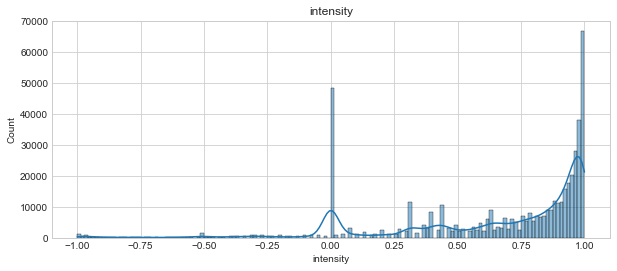

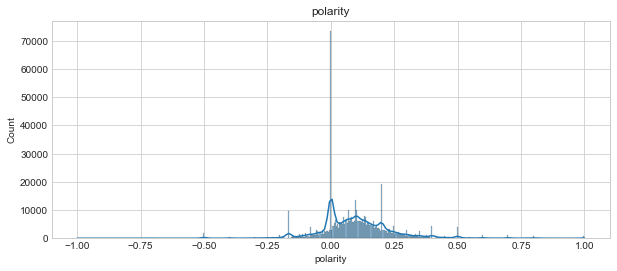

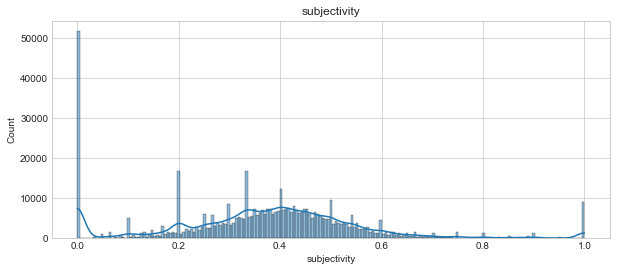

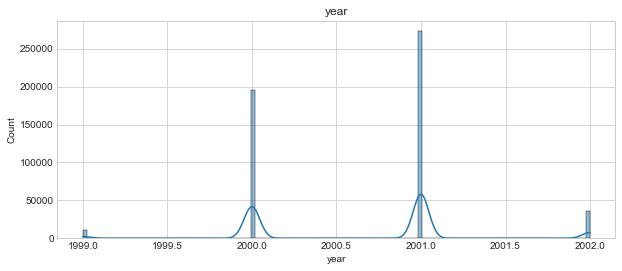

In [9]:
# Plot distribution of intensity, polarity, subjectivity, and year
viz.viz_1(time_series_df)

### Takeaways
- Intensity is mostly neutral or positive, polarity is mostly neutral, and subjectivity is mostly objective
- Most emails in 2000 and 2001

### What is the count of internal vs external emails?

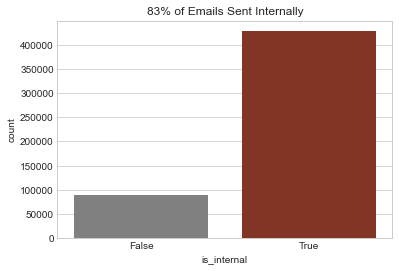

In [10]:
# plot internal vs not internal emails
viz.viz_2(df)

### Takeaways
- There are significantly more internal emails than external emails

### What is the count of email from persons of interest vs non-persons of interest?

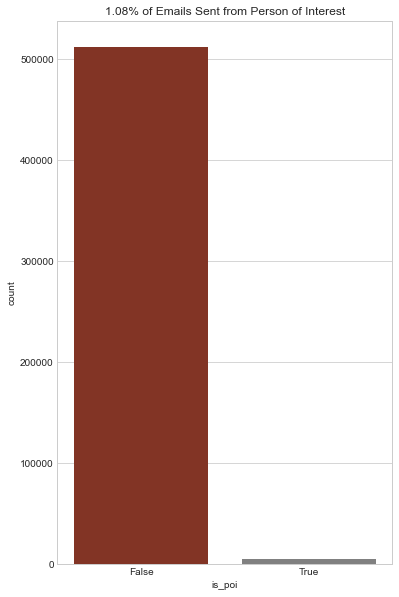

In [10]:
# emails sent from a non-person of of interest vs persons of interest
viz.viz_3(df)

### Takeaways
- Significantly more emails were sent from non-persons of interest

#### Takeaways from Univariate Exploration
- Intensity is mostly neutral or positive, polarity is mostly neutral, and subjectivity is mostly objective
- Most emails in 2000 and 2001
- There are significantly more internal emails than external emails
- Significantly more emails were sent from non-persons of interest

This is a very large corpus of employee emails. For the mvp we will focus only on the persons of interest from the years 1999 - 2002 for further exploratory analysis.

## Bivariate Exploration

### What are the distributions of each measure of sentiment by year?

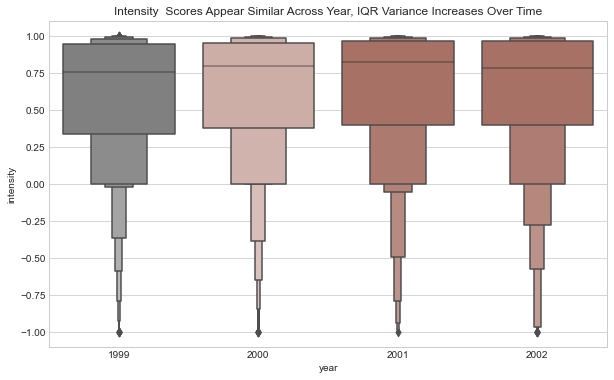

In [11]:
# plotting intensity score by year to look at median, IQR, and outliers
viz.viz_4(time_series_df)

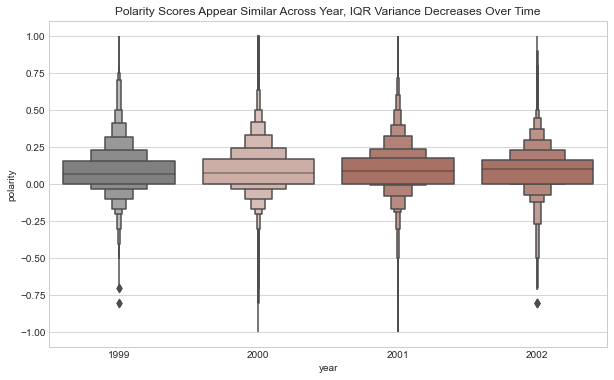

In [12]:
# plotting polarity score by year to look at median, IQR, and outliers
viz.viz_5(time_series_df)

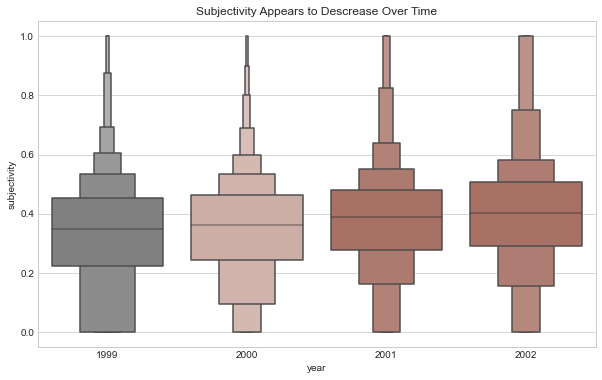

In [13]:
# # plotting subjectivity score by year to look at median, IQR, and outliers
viz.viz_6(time_series_df)

### Takeaways
- The distribution intensity, polarity, and subjectivity scores are mostly the same over the years

### What are the distributions of each measure of sentiment by internal vs external emails?

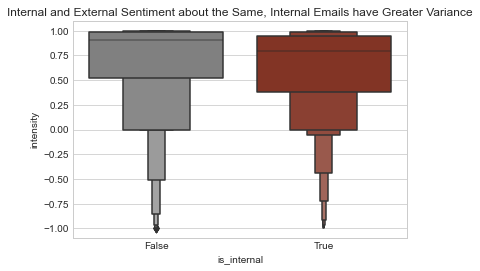

In [11]:
# Creates boxplot of intensity of internal/external emails
viz.viz_7(df)

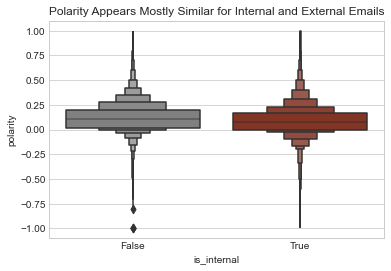

In [12]:
# Create boxplot of polarity of internal/external emails
viz.viz_8(df)

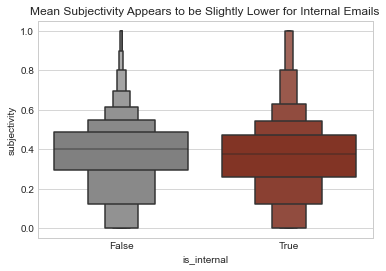

In [13]:
# Creates boxplot of subjectivity for internal/external email
viz.viz_9(df)

### Takeaways
- The distribution ofintensity, polarity, and subjectivity are mostly the same for internal vs external emails

### What are the distributions of each measure of sentiment by POI vs Non-POI?

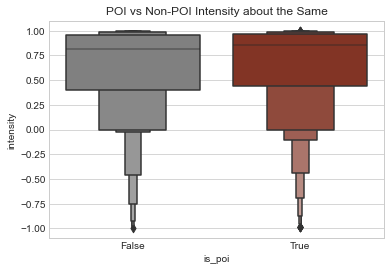

In [14]:
# Creates boxplot of intensity of internal/external emails
viz.viz_10(df)

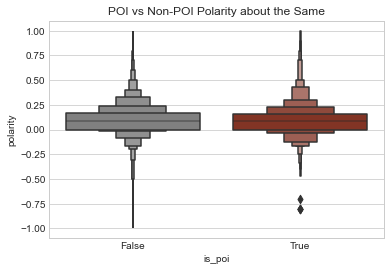

In [15]:
# Create boxplot of polarity of internal/external emails
viz.viz_11(df)

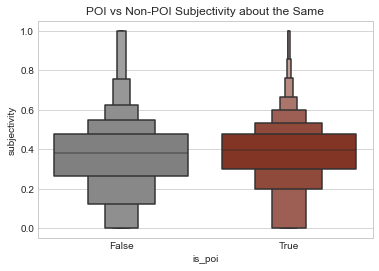

In [16]:
# Creates boxplot of subjectivity for internal/external email
viz.viz_12(df)

### Takeaways
- The distribution ofintensity, polarity, and subjectivity are mostly the same for POI vs Non-POI emails

## Takeaways from Bivariate Analysis
- The distribution ofintensity, polarity, and subjectivity are mostly the same through 1999-2002
- The distribution ofintensity, polarity, and subjectivity are mostly the same for internal vs external emails
- The distribution ofintensity, polarity, and subjectivity are mostly the same for POI vs Non-POI emails

## Multivariate Analysis

### Is there any correlation between variables?

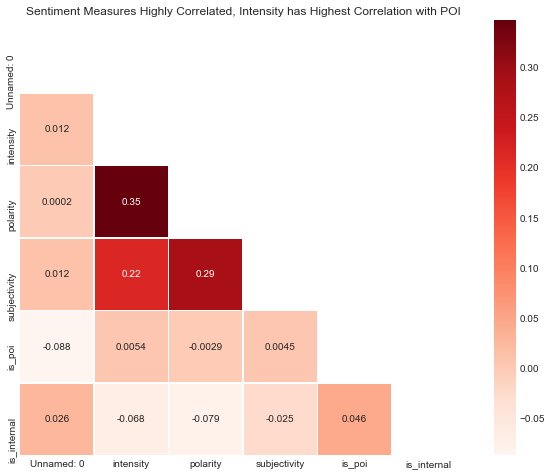

In [17]:
viz.viz_13(df)

### Takeaways from Multivariate Analysis
Measures of Sentiment Appear to be Correlated
- Highest correlation with polarity and intensity which makes sense since they are similar measures for sentiment
- Very small correlation of between is_internal and is_poi

## Time Series Analysis
### How does the aggregate sum of `intensity` change over time?

In [19]:
# # Plots sentiment overtime and color codes each year
# viz.viz_14(time_series_df)

### Takeaways
- Aggregate sum of intensity has significan dips at the end of 2001 which aligns with the scandal announcements.

### Is there any seasonality in the monthly `intensity` score? 

In [21]:
time_series_df.head()

date  intensity  polarity  subjectivity  year  month
0  1999-01-04 10:21:00+00:00     0.2023  0.000000      0.000000  1999      1
1  1999-01-04 10:21:00+00:00     0.2023  0.000000      0.000000  1999      1
2  1999-01-04 12:11:00+00:00     0.3182  0.016667      0.266667  1999      1
3  1999-01-04 12:11:00+00:00     0.3182  0.016667      0.266667  1999      1
4  1999-01-05 06:36:00+00:00     0.9895  0.076871      0.329783  1999      1

In [10]:
# import viz

In [7]:
time_series_df.date = pd.to_datetime(time_series_df.date)

In [8]:
time_series_df['hour'] = time_series_df.date.dt.hour

In [9]:
time_series_df['day'] = time_series_df.date.dt.day_of_week

In [11]:
time_series_df.head()

date  intensity  polarity  subjectivity  year  month  \
0 1999-01-04 10:21:00+00:00     0.2023  0.000000      0.000000  1999      1   
1 1999-01-04 10:21:00+00:00     0.2023  0.000000      0.000000  1999      1   
2 1999-01-04 12:11:00+00:00     0.3182  0.016667      0.266667  1999      1   
3 1999-01-04 12:11:00+00:00     0.3182  0.016667      0.266667  1999      1   
4 1999-01-05 06:36:00+00:00     0.9895  0.076871      0.329783  1999      1   

   hour  day  
0    10    0  
1    10    0  
2    12    0  
3    12    0  
4     6    1

In [55]:
day_hr_table = time_series_df.groupby([time_series_df.hour, time_series_df.day])\
                        .mean().unstack()

In [49]:
y_intensity = time_series_df.intensity

In [73]:
day_hr_table.intensity.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day')

In [74]:
day_hr_table.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

<Figure size 720x720 with 0 Axes>

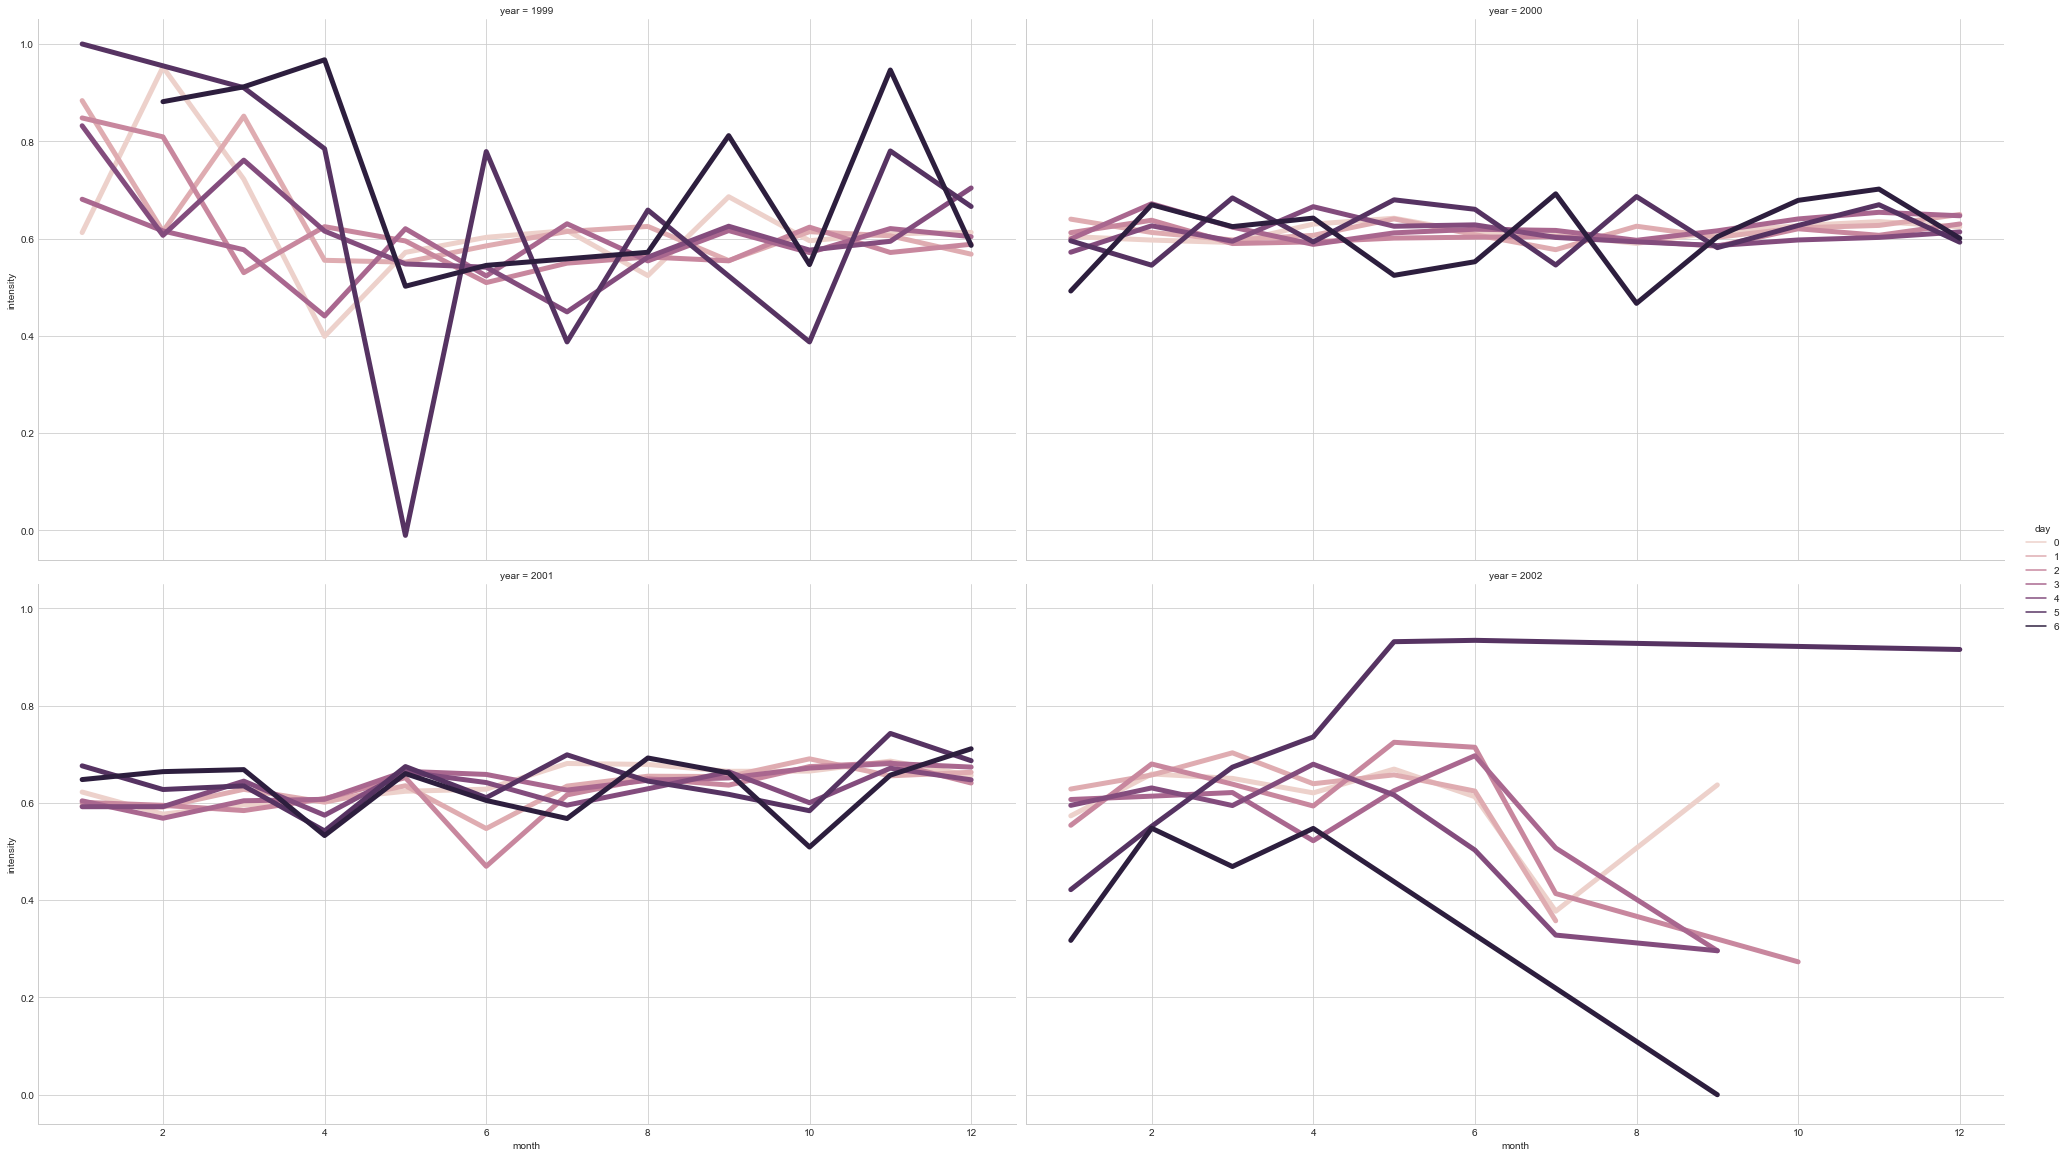

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 10))

sns.relplot(data = time_series_df, y = 'intensity', x = 'month', kind = 'line', \
            hue = 'day', height=8, aspect=14/8, ci = None,\
           linewidth = 5, col = 'year', col_wrap = 2)
plt.show()

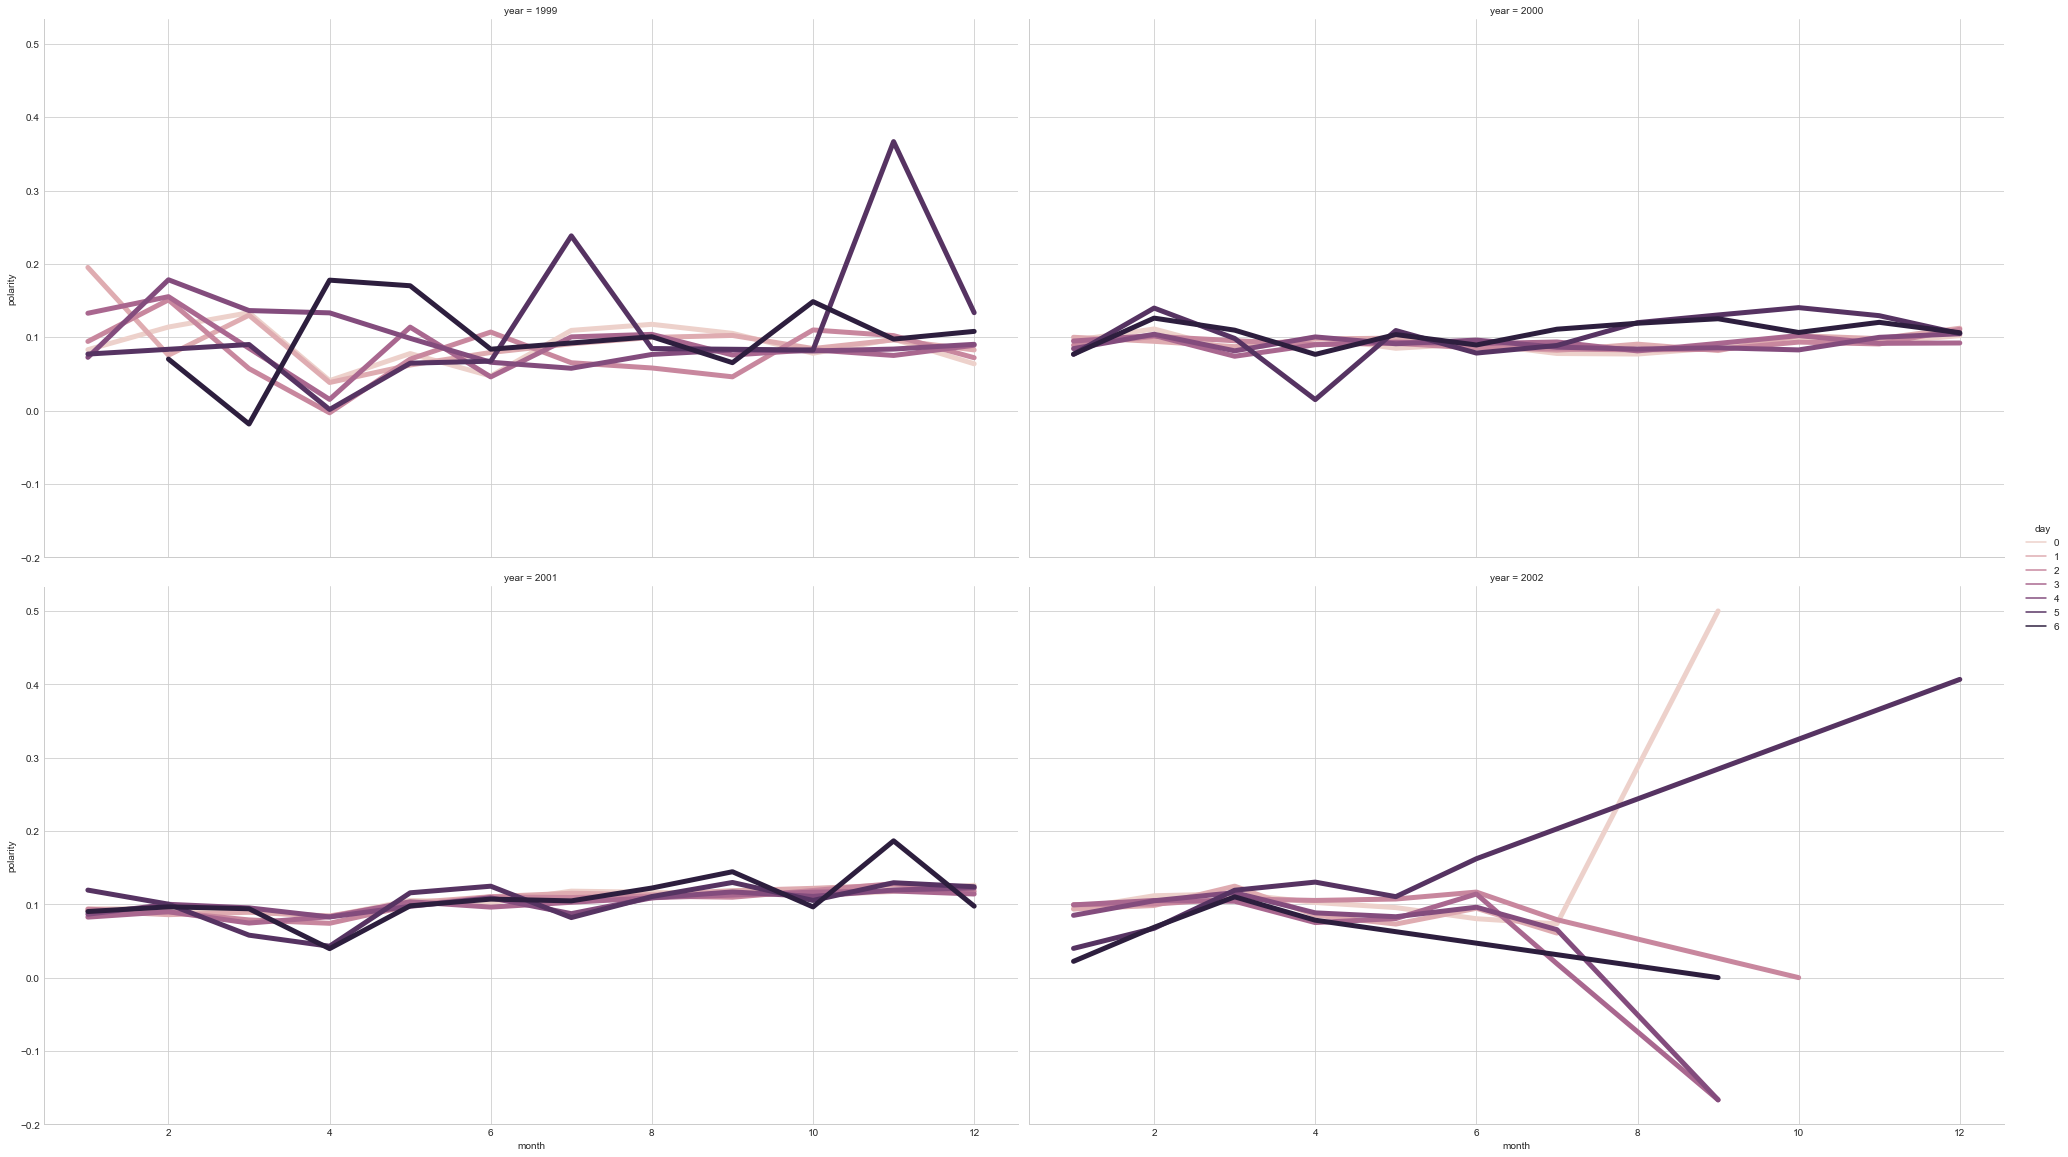

In [55]:
sns.relplot(data = time_series_df, y = 'polarity', x = 'month', kind = 'line', \
            hue = 'day', height=8, aspect=14/8, ci = None,\
           linewidth = 5, col = 'year', col_wrap = 2)
plt.show()

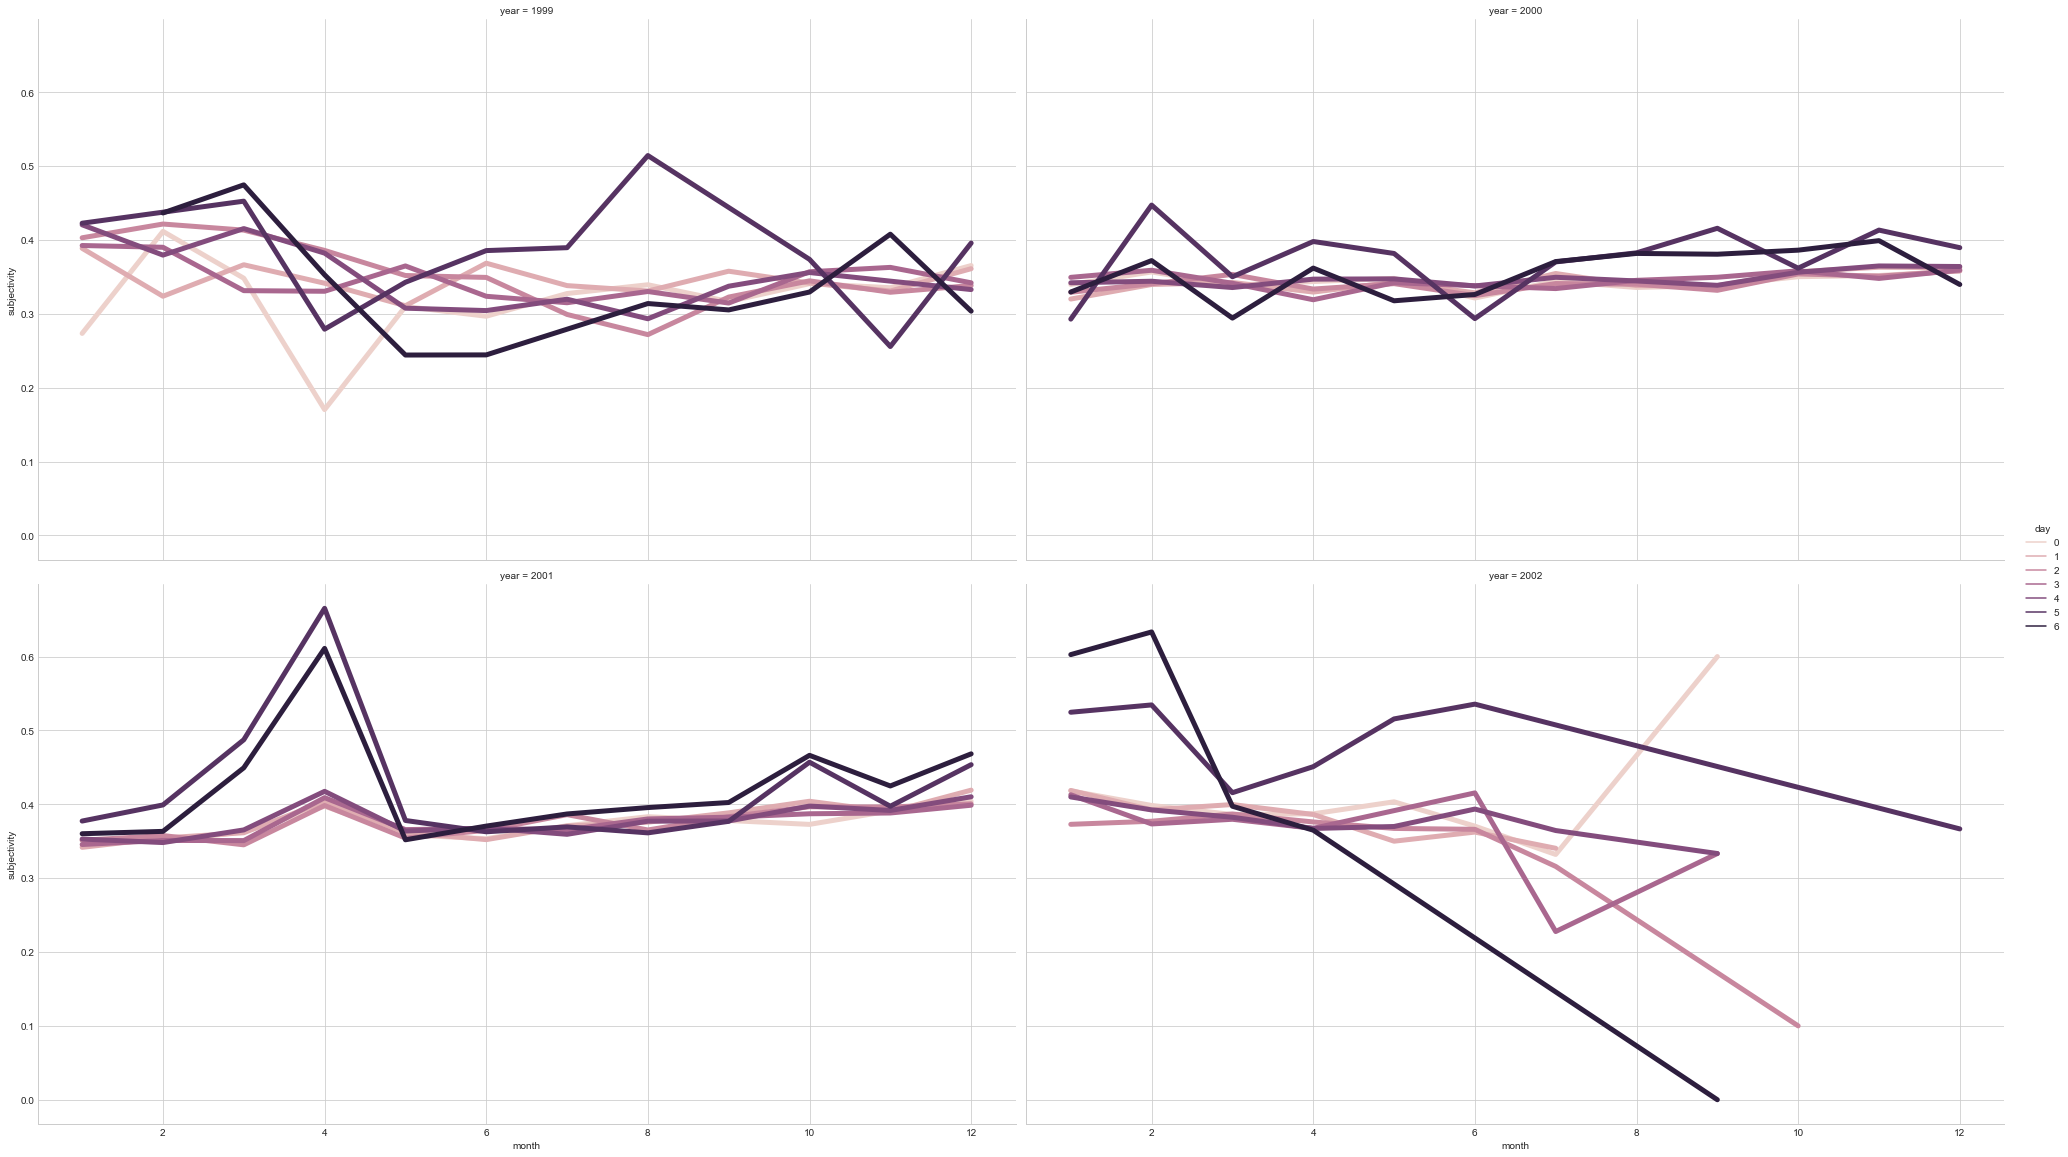

In [56]:
sns.relplot(data = time_series_df, y = 'subjectivity', x = 'month', kind = 'line', \
            hue = 'day', height=8, aspect=14/8, ci = None,\
           linewidth = 5, col = 'year', col_wrap = 2)
plt.show()

<Figure size 720x1440 with 0 Axes>

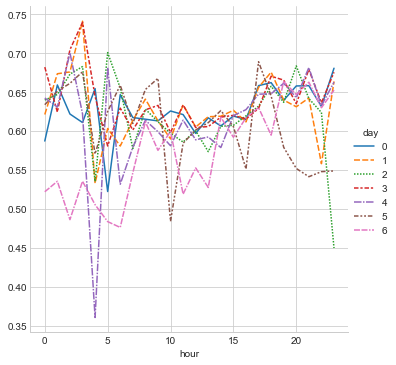

In [80]:


plt.figure(figsize = (10, 20))

sns.relplot(data = day_hr_table.intensity, kind = 'line')
plt.show()

In [48]:
# # Creates a seasonal plot by month
# viz.viz_15(time_series_df)

### Takeaway
- There are significant dips in intensity in three of the twelve months

### Takeaways from Time Series Analysis

- In 2000 Intensity scores have higher than normal positive spikes and in 2001 higher than normal positive and negative spikes. Based on what was going on (2000) being the year before Enron was caught and (2001) being the year they were caught this makes sense.

- Anyone investigating alleged mismanagement or suspicious activity could look for these abnormal spikes as indicators of: 
    1. When persons of interest may have been engaging in deceptive behavior that had positive impacts on the general population
    2. When the general population began to become aware of the deceptive practices.

# Topic Modeling

We used the `BERTopic` topic modeling algorithms to test our hypothesis, that we could identify unique themes in the email corpus by year. The functions used for this model can be found in the `model.py` module.
<hr>

### *Note: Reproducability may differ slightly due to the stochastic nature of UMAP
- UMAP uses randomness to increase approximation speed. Reference: https://umap-learn.readthedocs.io/en/latest/reproducibility.html
- To help with reproducability, the umap model hyper-parameters have been defined

### Subgroup to Persons of Interest for 2001 and 2002
- Because there are no significant differences of sentiment measures (intensity, polarity, and subjectivity) between POI vs Non_POI subgroups, topic modeling will use only those subgroups.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    517401 non-null  int64  
 1   file          517401 non-null  object 
 2   subject       498214 non-null  object 
 3   sender        517401 non-null  object 
 4   date          517401 non-null  object 
 5   content       517401 non-null  object 
 6   clean         517356 non-null  object 
 7   tokenize      517347 non-null  object 
 8   stop_words    517114 non-null  object 
 9   lemmatize     517114 non-null  object 
 10  intensity     517401 non-null  float64
 11  polarity      517401 non-null  float64
 12  subjectivity  517401 non-null  float64
 13  is_poi        517401 non-null  bool   
 14  is_internal   517401 non-null  bool   
dtypes: bool(2), float64(3), int64(1), object(9)
memory usage: 52.3+ MB


In [82]:
# # createn dataframes for poi==true for 2000 and 2001
# df_2000, df_2001 = wrangle.create_topic_dataframes(df)

In [58]:
df.date = pd.to_datetime(df.date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Unnamed: 0    517401 non-null  int64              
 1   file          517401 non-null  object             
 2   subject       498214 non-null  object             
 3   sender        517401 non-null  object             
 4   date          517401 non-null  datetime64[ns, UTC]
 5   content       517401 non-null  object             
 6   clean         517356 non-null  object             
 7   tokenize      517347 non-null  object             
 8   stop_words    517114 non-null  object             
 9   lemmatize     517114 non-null  object             
 10  intensity     517401 non-null  float64            
 11  polarity      517401 non-null  float64            
 12  subjectivity  517401 non-null  float64            
 13  is_poi        517401 non-null  bool         

In [59]:
# creating poi dfs for 2000 and 2001
is_poi_df = df[df.is_poi == True]

df_2000 = is_poi_df[is_poi_df.date.dt.year == 2000]
df_2001 = is_poi_df[is_poi_df.date.dt.year == 2001]

<AxesSubplot:>

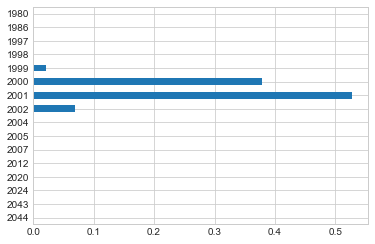

In [164]:


df.year.value_counts(normalize = True).sort_index(ascending = False).plot.barh()

In [167]:
topic_model.visualize_distribution(probabilities[0])

NameError: name 'probabilities' is not defined

## BERTopic

## What are the topic for POI emails in 2000?

In [60]:
# This functions runs BERTopic on lemm data to get topics and it also produced sentiment values per toptic
topics, probs, topic_model, topics_df, docs_df, topics_scores, emails_lemm = model.create_topic_scores(df=df_2000)
topics_scores.head(20)

topic  count                                               name  \
0       0     45                               0_iso_bid_calpine_sc   
1       1     44  1_communicationsenron_communication_asia_massa...   
2       2     43                         2_survey_pulse_employee_20   
3       3     43                 3_darlene_holiday_jordan_christmas   
4       4     42                           4_adam_wind_deal_merrill   
5       5     40        5_reviewer_pep_httppepcorpenroncom_approval   
6       6     37                  6_ecogaskafus_kern_quiet_delainey   
7       7     36                      7_mm_fcel_premoney_utiliquest   
8       8     36                  8_version_jeannie_section_america   
9       9     36                  9_flame_calgary_barry_sponsorship   
10     10     36                       10_venita_qbr_tracy_12062000   
11     11     35  11_communicationsenron_communication_lillian_brad   
12     12     34                           12_prc_stearns_bear_page   
13     13     34             13_category_performance_stuart_ranking   
14     14     34                         14_max_08212000_dick_vitro   
15     15     33                15_sound_delainey_adrian_babysitter   
16     16     33                   16_memo_draft_tommorrow_12062000   
17     17     33                   17_video_stay_friday_committment   
18     18     32                            18_aga_chart_marion_gas   
19     19     31                19_rick_underappreciated_god_thanks   

                                            lemmatize  intensity  polarity  \
0   ["think everyone heard make even imperative co...     0.9826  0.064115   
1   ["scott emission strategy counterparties regar...     0.9928  0.128566   
2   ['john completely agree view david would matri...     0.9982  0.064206   
3   ["pls set forwarded david w delaineyhouect 091...     0.9904  0.122222   
4   ["guy keep pressure guy think adam corner lot ...     0.9984  0.123880   
5   ['forwarded david w delaineyhouect 11082000 11...     0.9847 -0.166667   
6   ['let hang tough day two nothing needed cinerg...     0.4939  0.242593   
7   ["although believe assumption correct one outc...     0.9925  0.024510   
8   ['forwarded david w delaineyhouect 05122000 02...     0.3182 -0.083333   
9   ["please extend offer employment anyone withou...     0.9960  0.179167   
10  ['joe couple point please check spelling typo ...     0.9607  0.134530   
11  ["forwarded david w delaineyhouect 09272000 10...     0.4404 -0.166667   
12  ["tim please provide jana choice person asap r...     0.9964  0.098194   
13  ['mike keep approval amount 20m regard delaine...     0.9852  0.007303   
14  ["forwarded david w delaineyhouect 08252000 12...    -0.2263  0.229167   
15  ['adrian welcome regard delainey', 'great rob ...     0.7096  0.800000   
16  ['updated draft memo regard delainey forwarded...     0.8591 -0.152778   
17  ['guy attached find preliminary agenda 2000 en...     0.9186  0.056667   
18  ["would suggest get middle market group togeth...     0.9590  0.133636   
19  ['go ok rick', 'thanks guy need rest great hol...     0.9201  0.500000   

    subjectivity  
0       0.428888  
1       0.382918  
2       0.416614  
3       0.471111  
4       0.436150  
5       0.333333  
6       0.644444  
7       0.460784  
8       0.166667  
9       0.494537  
10      0.451356  
11      0.333333  
12      0.374954  
13      0.391869  
14      0.304167  
15      0.825000  
16      0.458333  
17      0.402500  
18      0.320038  
19      0.487500

In [61]:
topic_model.find_topics('California')

([61, 80, 101, 8, 22],
 [0.5755954906210777,
  0.5694268006636053,
  0.5673942613222622,
  0.5627764526828369,
  0.5500919302148533])

In [62]:
topic_model.get_topic(61)

[('calif', 0.04343575659996891),
 ('divestiture', 0.028501617073333405),
 ('ferc', 0.025963873785247404),
 ('cgas', 0.025236824409978622),
 ('jedi', 0.025021691103796952),
 ('sdge', 0.024526753709184716),
 ('complaint', 0.023412206207658194),
 ('px', 0.020506271276486392),
 ('epmi', 0.01773554340914547),
 ('basic', 0.01601809044632654)]

In [63]:
topic_model.get_topic(80)

[('ferc', 0.04375816588329248),
 ('commissioner', 0.0368991956998812),
 ('electricity', 0.03324157780701282),
 ('california', 0.0324216551694957),
 ('hebert', 0.03214744656481637),
 ('price', 0.028433156760700528),
 ('cap', 0.028045097204733988),
 ('state', 0.022107696189097477),
 ('power', 0.018914209286547752),
 ('energy', 0.017068182553773414)]

In [64]:
topic_model.get_topic(101)

[('10042000', 0.05125434126081043),
 ('florida', 0.05055678085266096),
 ('soco', 0.03884997781371019),
 ('se', 0.0357433516030606),
 ('transmission', 0.03421388144276261),
 ('jae', 0.03314540341791337),
 ('tamara', 0.03314540341791337),
 ('goldendale', 0.03289036164922722),
 ('10062000', 0.030394303865254983),
 ('idea', 0.02674473829805569)]

In [66]:
topic_model.get_topic(22)

[('tennessee', 0.017966253692399112),
 ('contribution', 0.017202321666391976),
 ('rio', 0.017128451125275283),
 ('barry', 0.014645551214037855),
 ('barbara', 0.014238707943658908),
 ('office', 0.012635334235256108),
 ('itinerary', 0.012066918397281415),
 ('senate', 0.012066918397281415),
 ('tax', 0.012003806729536439),
 ('receipt', 0.011761551878630403)]

In [156]:
topic_model.visualize_topics()

In [72]:
topic_model.visualize_barchart()

In [135]:
topic_model.find_topics('protest')

([58, 23, 53, 32, 39],
 [0.625822320263084,
  0.4479076207076338,
  0.441333608609619,
  0.44051618461777,
  0.4401301526449193])

In [141]:
topic_model.get_topic(39)

[('rick', 0.2507862910071164),
 ('chevy', 0.15268323229662747),
 ('progress', 0.14768453855612848),
 ('moving', 0.13754157531719186),
 ('roll', 0.13730300973251944),
 ('worried', 0.13730300973251944),
 ('hate', 0.10957871601715063),
 ('keep', 0.10346235115459271),
 ('busy', 0.10172125216490169),
 ('coordinating', 0.09833372674715184)]

In [143]:
df[(df.content.str.contains('protest')) & (df.year == 2000)]

Unnamed: 0                               file  \
8820          8820        badeer-r/all_documents/264.   
9001          9001            badeer-r/california/60.   
9239          9239    badeer-r/discussion_threads/32.   
9947          9947            bass-e/_sent_mail/1003.   
9960          9960            bass-e/_sent_mail/1015.   
...            ...                                ...   
501273      501273       whalley-l/all_documents/606.   
502597      502597  whalley-l/discussion_threads/569.   
502652      502652  whalley-l/discussion_threads/621.   
502904      502904         whalley-l/notes_inbox/211.   
502956      502956         whalley-l/notes_inbox/264.   

                                                  subject  \
8820    *** INTERRUPTIBLE CUSTOMERS CAN PARTICIPATE IN...   
9001    *** INTERRUPTIBLE CUSTOMERS CAN PARTICIPATE IN...   
9239    *** INTERRUPTIBLE CUSTOMERS CAN PARTICIPATE IN...   
9947                         Fw: Winning the cultural war   
9960                         Fw: Winning the cultural war   
...                                                   ...   
501273               Help Our Servicemen Save Their Votes   
502597               Help Our Servicemen Save Their Votes   
502652                                  Truth Versus Gore   
502904                                  Truth Versus Gore   
502956               Help Our Servicemen Save Their Votes   

                                 sender                      date  \
8820               susan.mara@enron.com 2000-06-15 16:56:00+00:00   
9001               susan.mara@enron.com 2000-06-15 16:56:00+00:00   
9239               susan.mara@enron.com 2000-06-15 16:56:00+00:00   
9947                eric.bass@enron.com 2000-02-07 17:02:00+00:00   
9960                eric.bass@enron.com 2000-02-02 15:35:00+00:00   
...                                 ...                       ...   
501273  eleader@mail.echampions2000.com 2000-11-22 02:25:00+00:00   
502597  eleader@mail.echampions2000.com 2000-11-22 02:25:00+00:00   
502652  eleader@mail.echampions2000.com 2000-11-29 10:05:00+00:00   
502904  eleader@mail.echampions2000.com 2000-11-29 10:05:00+00:00   
502956  eleader@mail.echampions2000.com 2000-11-22 02:25:00+00:00   

                                                  content  \
8820    Load is up in CA and so is the potential for s...   
9001    Load is up in CA and so is the potential for s...   
9239    Load is up in CA and so is the potential for s...   
9947    ---------------------- Forwarded by Eric Bass/...   
9960    ---------------------- Forwarded by Eric Bass/...   
...                                                   ...   
501273  Help Our Servicemen Save Their Votes\n\n******...   
502597  Help Our Servicemen Save Their Votes\n\n******...   
502652  Dear eChampion,\n\nPlease review the following...   
502904  Dear eChampion,\n\nPlease review the following...   
502956  Help Our Servicemen Save Their Votes\n\n******...   

                                                    clean  \
8820    load is up in ca and so is the potential for s...   
9001    load is up in ca and so is the potential for s...   
9239    load is up in ca and so is the potential for s...   
9947     forwarded by eric basshouect on 02072000 0502...   
9960     forwarded by eric basshouect on 02022000 0333...   
...                                                   ...   
501273  help our servicemen save their votes   help de...   
502597  help our servicemen save their votes   help de...   
502652  dear echampion  please review the following fa...   
502904  dear echampion  please review the following fa...   
502956  help our servicemen save their votes   help de...   

                                                 tokenize  \
8820    load is up in ca and so is the potential for s...   
9001    load is up in ca and so is the potential for s...   
9239    load is up in ca and so is the potential for s...   
9947    forwarded by eric basshouect on 02072000 05

In [152]:
num

subject  \
88312       Protests of utility market-based rates   
88494     EPMI protests AEP's continuation of MBRs   
88546          Ada pump and QF concerns in general   
89059  Re: HQ files to continue market based rates   
89079      HQ files to continue market based rates   
89090      HQ files to continue market based rates   
89163  Re: HQ files to continue market based rates   
89166      HQ files to continue market based rates   
89167      HQ files to continue market based rates   
89231       Protests of utility market-based rates   
89401     EPMI protests AEP's continuation of MBRs   
89451          Ada pump and QF concerns in general   
90477          Ada pump and QF concerns in general   
90524     EPMI protests AEP's continuation of MBRs   
90661       Protests of utility market-based rates   
90708      HQ files to continue market based rates   
90709      HQ files to continue market based rates   
90711  Re: HQ files to continue market based rates   
90998       Protests of utility market-based rates   
91180     EPMI protests AEP's continuation of MBRs   
91232          Ada pump and QF concerns in general   
91745  Re: HQ files to continue market based rates   
91765      HQ files to continue market based rates   
91776      HQ files to continue market based rates   

                                                 content  \
88312  Christi, please provide me with a timeline of ...   
88494  Christi, I was unable to open the file can you...   
88546  Chuck, I appreciate the note - I just like to ...   
89059  Milly is ok; however, I would like a quick rea...   
89079  Christy, can we send these documents in word f...   
89090  Rob, we are planning to file the following pro...   
89163  Milly is ok; however, I would like a quick rea...   
89166  Christy, can we send these documents in word f...   
89167  Rob, we are planning to file the following pro...   
89231  Christi, please provide me with a timeline of ...   
89401  Christi, I was unable to open the file can you...   
89451  Chuck, I appreciate the note - I just like to ...   
90477  Chuck, I appreciate the note - I just like to ...   
90524  Christi, I was unable to open the file can you...   
90661  Christi, please provide me with a timeline of ...   
90708  Rob, we are planning to file the following pro...   
90709  Christy, can we send these documents in word f...   
90711  Milly is ok; however, I would like a quick rea...   
90998  Christi, please provide me with a timeline of ...   
91180  Christi, I was unable to open the file can you...   
91232  Chuck, I appreciate the note - I just like to ...   
91745  Milly is ok; however, I would like a quick rea...   
91765  Christy, can we send these documents in word f...   
91776  Rob, we are planning to file the following pro...   

                           date  month  
88312 2000-11-08 12:51:00+00:00     11  
88494 2000-09-25 10:31:00+00:00      9  
88546 2000-08-30 09:57:00+00:00      8  
89059 2000-11-21 08:46:00+00:00     11  
89079 2000-11-20 19:36:00+00:00     11  
89090 2000-11-20 19:35:00+00:00     11  
89163 2000-11-21 08:46:00+00:00     11  
89166 2000-11-20 19:36:00+00:00     11  
89167 2000-11-20 19:35:00+00:00     11  
89231 2000-11-08 12:51:00+00:00     11  
89401 2000-09-25 10:31:00+00:00      9  
89451 2000-08-30 09:57:00+00:00      8  
90477 2000-08-30 09:57:00+00:00      8  
90524 2000-09-25 10:31:00+00:00      9  
90661 2000-11-08 12:51:00+00:00     11  
90708 2000-11-20 19:35:00+00:00     11  
90709 2000-11-20 19:36:00+00:00     11  
90711 2000-11-21 08:46:00+00:00     11  
90998 2000-11-08 12:51:00+00:00     11  
91180 2000-09-25 10:31:00+00:00      9  
91232 2000-08-30 09:57:00+00:00      8  
91745 2000-11-21 08:46:00+00:00     11  
91765 2000-11-20 19:36:00+00:00     11  
91776 2000-11-20 19:35:00+00:00     11

In [155]:
for num in df[(df.content.str.contains('protest')) & (df.year == 2000) & (df.is_poi == True)][['subject', 'content', 'date', 'month']].index:
    print(df.content[num])
    print()
    print()

Christi, please provide me with a timeline of when you expect to be filing 
protests against each utility.  As well, please ensure that both Kevin and I 
sign off on the filing before it goes out.

Regards

---------------------- Forwarded by David W Delainey/HOU/ECT on 11/08/2000 
11:51 AM ---------------------------
   
	
	
	From:  Christi L Nicolay                           11/08/2000 09:58 AM
	

To: David W Delainey/HOU/ECT@ECT, John J Lavorato/Corp/Enron@Enron, Edward D 
Baughman/HOU/ECT@ECT, Fletcher J Sturm/HOU/ECT@ECT, Janet R 
Dietrich/HOU/ECT@ECT, Jeffery Ader/HOU/ECT@ECT, Mark Dana Davis/HOU/ECT@ECT, 
Ozzie Pagan/HOU/ECT@ECT, Rogers Herndon/HOU/ECT@ect, Bruce 
Sukaly/Corp/Enron@Enron, Doug Gilbert-Smith/Corp/Enron@ENRON, James D 
Steffes/NA/Enron@Enron, Jeff Brown/NA/Enron@Enron, Janine 
Migden/NA/Enron@Enron, David Fairley/HOU/ECT@ECT, Kerry 
Stroup/NA/Enron@Enron, Roy Boston/HOU/EES@EES, Susan M 
Landwehr/NA/Enron@Enron, Joe Connor/NA/Enron@Enron, Steve 
Montovano/NA/Enron

In [78]:
topic_model.top_n_words

10

In [86]:
df['year'] = df.date.dt.year

In [122]:
df['month'] = df.date.dt.month

In [132]:
df[(df.is_poi == True) & (df.year == 2000) & (df.content.str.contains('divestiture'))].index.to_list()

[88467,
 88470,
 89132,
 89373,
 89375,
 90046,
 90100,
 90543,
 90545,
 91153,
 91156,
 91824]

In [115]:
df.head()

Unnamed: 0                      file    subject                   sender  \
0           0     allen-p/_sent_mail/1.        NaN  phillip.allen@enron.com   
1           1    allen-p/_sent_mail/10.        Re:  phillip.allen@enron.com   
2           2   allen-p/_sent_mail/100.   Re: test  phillip.allen@enron.com   
3           3  allen-p/_sent_mail/1000.        NaN  phillip.allen@enron.com   
4           4  allen-p/_sent_mail/1001.  Re: Hello  phillip.allen@enron.com   

                       date  \
0 2001-05-14 23:39:00+00:00   
1 2001-05-04 20:51:00+00:00   
2 2000-10-18 10:00:00+00:00   
3 2000-10-23 13:13:00+00:00   
4 2000-08-31 12:07:00+00:00   

                                             content  \
0                          Here is our forecast\n\n    
1  Traveling to have a business meeting takes the...   
2                     test successful.  way to go!!!   
3  Randy,\n\n Can you send me a schedule of the s...   
4                Let's shoot for Tuesday at 11:45.     

                                               clean  \
0                               here is our forecast   
1  traveling to have a business meeting takes the...   
2                         test successful  way to go   
3  randy   can you send me a schedule of the sala...   
4                    let's shoot for tuesday at 1145   

                                            tokenize  \
0                               here is our forecast   
1  traveling to have a business meeting takes the...   
2                          test successful way to go   
3  randy can you send me a schedule of the salary...   
4                  let ' s shoot for tuesday at 1145   

                                          stop_words  \
0                                           forecast   
1  traveling business meeting takes fun trip espe...   
2                             test successful way go   
3  randy send schedule salary level everyone sche...   
4                           let ' shoot tuesday 1145   

                                           lemmatize  intensity  polarity  \
0                                           forecast     0.0000      0.00   
1  traveling business meeting take fun trip espec...     0.9313      0.15   
2                             test successful way go     0.5859      0.75   
3  randy send schedule salary level everyone sche...     0.0000      0.00   
4                           let ' shoot tuesday 1145    -0.3400      0.00   

   subjectivity  is_poi  is_internal  year  
0      0.000000   False         True  2001  
1      0.613333   False         True  2001  
2      0.950000   False         True  2000  
3      0.000000   False         True  2000  
4      0.000000   False         True  2000

<AxesSubplot:>

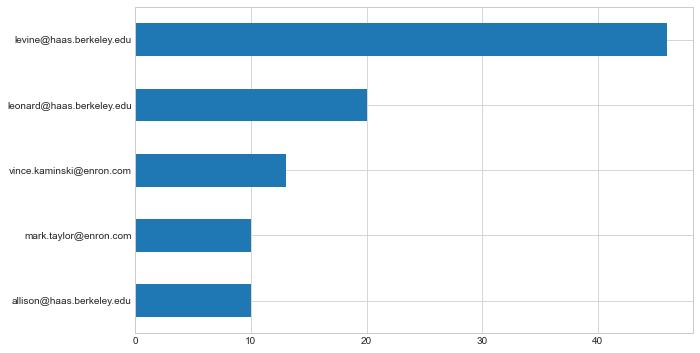

In [101]:
plt.figure(figsize = (10, 6))

df[(df.content.str.contains('California')) & (df.year == 1999)].sender.value_counts().head().sort_values().plot.barh()

In [110]:
print(df.content[29574])


Here's a pretty good article on Enron that was sent to all of EES.
It may not be a bad idea to send it to all of ENW.

-anthony

 -----Original Message-----
From: 	Mahoney, Peggy  
Sent:	Monday, November 19, 2001 10:29 AM
To:	All EES@ENRON
Subject:	What Enron Did Right

A great editorial in the Wall Street Journal today.

Manager's Journal:
What Enron Did Right
By Samuel Bodily and Robert Bruner

11/19/2001
The Wall Street Journal
A20
(Copyright (c) 2001, Dow Jones & Company, Inc.)

  This is a rough era for American business icons. Subject to the
vagaries of age (Jack Welch), product failure (Ford/Firestone tires),
competition (Lucent, AT&T), technology (Hewlett-Packard and Compaq), and
dot-bomb bubbles (CMGI), managers and their firms remind us that being
an icon is risky business. The latest example is Enron, whose fall from
grace has resulted in a proposed fire sale to Dynegy.

   Once considered one of the country's most innovative companies, Enron
became a pariah due to lack of 

In [133]:
for num in [88467,
 88470,
 89132,
 89373,
 89375,
 90046,
 90100,
 90543,
 90545,
 91153,
 91156,
 91824]:
    print(df.content[num])
    print()
    print()

David, you may be getting to the nub here.  Ultimately, this is a lot more 
art than science.  It will be difficult to come up with a mathematic decision 
rule to manage this process.  I am looking to the opinions of yourself, Ray, 
Dick and Jeff, given the facts in each case, does this appear to be a good 
trade given the market, the specifics of the company, the carrying costs of 
the asset and perhaps our desire to increase capital flow to higher return 
assets (ROCE >25%).

This is clearly not a fire sale and I trust the opinion or consensus that 
comes from this group.  As a result, I need to have a positve consensus from 
this group in each case.

Regards
Delainey
---------------------- Forwarded by David W Delainey/HOU/ECT on 09/29/2000 
09:55 AM ---------------------------


David Gorte
09/29/2000 09:48 AM
To: David W Delainey/HOU/ECT@ECT
cc: Rick Buy/HOU/ECT@ECT, Jeff Donahue/HOU/ECT@ECT, Richard 
Lydecker/Corp/Enron@Enron, Raymond Bowen/HOU/ECT@ECT 
Subject: Re: Basic  

Dave

### Takeaways
- Produced too many topics to analyze. Need to reduce topic count.

### What does the topics hierarchy look like?

In [21]:
model.topic_tree(topic_model)

### Takeways
- The clustering can be broken down into 18 major groups defined by colors

### What are the topics when topic numer is reduced to 18?

In [22]:
topic_model, topics_df, docs_df, topics_scores = model.create_topic_scores_reduced(emails_lemm, topics, topic_model, i=18)
topics_scores.head(20)

topic  count                                            name  \
0       0    178                     0_barge_delainey_regard_guy   
1       1    138                               1_iso_bid_ttc_jmf   
2       2    138                             2_dave_pm_kay_david   
3       3    137                         3_rick_curve_uk_houston   
4       4    128                    4_ena_performance_trip_march   
5       5    107          5_reviewer_suggested_feedback_approval   
6       6     95  6_communicationsenron_communication_david_john   
7       7     82                        7_cost_outside_group_ena   
8       8     76                         8_prc_page_fyi_approval   
9       9     75                      9_calgary_barry_flame_desk   
10     10     72             10_unit_westinghouse_blade_schedule   
11     11     69                       11_memo_12062000_pm_david   
12     12     69             12_product_producer_insurance_group   
13     13     67                       13_20_south_enron_america   
14     14     67             14_mariner_raptor_significant_value   
15     15     65                        15_esca_alstom_gas_david   
16     16     64                      16_asset_borska_value_cgas   
17     17     61                           17_cap_price_ferc_iso   

                                            lemmatize  intensity  polarity  \
0   ['ok', 'ok', 'ok', 'see attached', 'see attach...     0.9904  0.109738   
1   ["following procedure effective tomorrow octob...     0.9998  0.114699   
2   ["guy would like schedule quarterly meeting re...     0.9999  0.107877   
3   ["look good possibly ' need last two item need...     0.9968  0.046888   
4   ['please plan attending presenting regard dela...     0.9999  0.073528   
5   ['forwarded david w delaineyhouect 11082000 11...     0.9987 -0.097222   
6   ['kay see go regard delainey forwarded david w...     0.9993  0.074513   
7   ['guy attached find final cut ena 2001 expense...     0.9995  0.058546   
8   ["tim please provide jana choice person asap r...     0.9995  0.056594   
9   ["please extend offer employment anyone withou...     0.9984  0.091283   
10  ['eric need 2m saving get deal clear hurdle th...     0.9982  0.118363   
11  ['joe couple point please check spelling typo ...     0.9607  0.027632   
12  ["idea guy john jere ' get together regard del...     0.9982  0.084692   
13  ["sarah cindy olson requested forward handling...     0.9999  0.163539   
14  ["sally ted brenda vlady met today discus proj...     0.9992  0.105457   
15  ['jeff would like discus plan gas regard delai...     0.9983  0.126237   
16  ['test3', 'test', 'working', "fyi forwarded da...     0.9999  0.139262   
17  ["jim agree let put plan place ensure appropri...     0.9949  0.112902   

    subjectivity  
0       0.436407  
1       0.415737  
2       0.356966  
3       0.432371  
4       0.390803  
5       0.328030  
6       0.441928  
7       0.331318  
8       0.419744  
9       0.399192  
10      0.421019  
11      0.386404  
12      0.455771  
13      0.364422  
14      0.402049  
15      0.350475  
16      0.482544  
17      0.417902

In [30]:
topic_model.find_topics('california')

([13, 17, 7, 8, 3],
 [0.545595958016561,
  0.5116934584022068,
  0.49473978036218486,
  0.48062999755050867,
  0.45986023298861095])

### Takeaways
- Topics are very different

### What does the topics hierarchy look like?

In [23]:
model.topic_tree(topic_model)

### Takeaways
- Can be clustered into one hierarchical group

### What are the topics related to the word "attack" in 2001?
- This method creates an embedding for search_term and compares that with the topic embeddings. The most similar topics are returned along with their similarity values.

In [25]:
topics, similarity = topic_model.find_topics('attack')
topics_df[topics_df.topic.isin(topics)]

topic  count                          name
2       1    138             1_iso_bid_ttc_jmf
5       4    128  4_ena_performance_trip_march
10      9     75    9_calgary_barry_flame_desk
17     16     64    16_asset_borska_value_cgas
18     17     61         17_cap_price_ferc_iso

### Takeaways
- The top topic found in the search of "attack" is also the top topic of the model

### What are the topics for POI emails in 2001?

In [ ]:
topics, probs, topic_model, topics_df, docs_df, topics_scores, emails_lemm = model.create_topic_scores(df=df_2001)
topics_scores.head(20)

### Takeaways
- Repeat word for topic: Rick, Communicationsenron

### What does the topics hierarch look like?

In [ ]:
model.topic_tree(topic_model)

### Takeaways
- Topics can be reduced to 8, defined by color

### What are the topics if the number is reduced to 8?

In [ ]:
topic_model, topics_df, docs_df, topics_scores = model.create_topic_scores_reduced(emails_lemm, topics, topic_model, i=8)
topics_scores.head(20)

### Takeaways
- Rick and communicationsenron are top two topics

### What does the topics hierarchy look like? 

In [ ]:
model.topic_tree(topic_model)

## Takeaways
- Can be grouped together in one hierarchical cluster.

### What are the topics related to the word "attack" in 2001?
- This method creates an embedding for search_term and compares that with the topic embeddings. The most similar topics are returned along with their similarity values.

In [24]:
topics, similarity = topic_model.find_topics('attack')
topics_df[topics_df.topic.isin(topics)]

topic  count                          name
2       1    138             1_iso_bid_ttc_jmf
5       4    128  4_ena_performance_trip_march
10      9     75    9_calgary_barry_flame_desk
17     16     64    16_asset_borska_value_cgas
18     17     61         17_cap_price_ferc_iso

### Takeaways
- Top topic is also the top topic for the model

## Modeling Takeaways
- Takeaways will vary due to UMAP
- Model top topics remain in the reduced model and when when searching for related topics

# Conclusion
## Summary

We acquired, cleaned, and filtered through a corpus of 500k+ enron employee emails. We performed exploratory univariate, bivariate and multivariate analysis on our numerical and categorical, non-text variables. We also performed time series analysis to identify any patterns or unsual activity at key points in the data timeline. Finally, we performed topic modeling on the email text to identify any unique themes in the years 2000 or 2001.
<br>

We found the topic modeling could be used to identify themes and then search the company's timeline to find matching events that lined up with the themes.

## Recommendation
This project can be used for:
- Looking at employee salaries
- Legislative investigations
- Media Reporting
- Public Research


## Next Steps:
With more time, we would:
- Scale x3 sentiment scores
- Explore Nulls
- Explore Word Frequency Analysis with Email Subject
- Explore email recipients
- Explore and model with non-POI and POI emails (not just POI)
- Bin intensity, polarity, and subjectivity scores
- Explore clustering with the three different measures for sentiment
- Explore variables related to persons of interest, such as tenure with the company, salary, and investigation outcome